<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1">Описание проекта</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-2">Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3">Предобработка данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Стиль-загольовков-таблиц" data-toc-modified-id="Стиль-загольовков-таблиц-3.0.1">Стиль загольовков таблиц</a></span></li><li><span><a href="#Проверка-дубликатов" data-toc-modified-id="Проверка-дубликатов-3.0.2">Проверка дубликатов</a></span></li></ul></li></ul></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-4">Исследовательский анализ данных (EDA)</a></span></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Модель-прогнозирования-оттока-клиентов-5">Модель прогнозирования оттока клиентов</a></span></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-6">Кластеризация клиентов</a></span></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-7">Выводы и рекомендации</a></span></li></ul></div>

# Описание проекта

Сеть фитнес-центров "Культурист-датасаентист"  разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных и предоставили сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. 

**Цель исследования** — провести анализ и подготовить план действий по удержанию клиентов, а именно: 
 - научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
 - сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
 - проанализировать основные признаки, наиболее сильно влияющие на отток;
 - сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
      * выделить целевые группы клиентов;
      * предложить меры по снижению оттока;
      * определить другие особенности взаимодействия с клиентами.

**Ход исследования**:

1. Обзор данных.
2. Преобработка данных.
3. Исследовательский анализ данных (EDA).
4. Модель прогнозирования отток клиентов.
5. Кластеризация клиентов.
6. Выводы и рекомендации.

# Обзор данных

In [1]:
#импортируем необходимые библиотеки для работы

import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import matplotlib.pyplot as plt


In [2]:
#прочитаем файл с сохранием их в переменных
try:
    data = pd.read_csv('/datasets/gym_churn.csv')
except:
    data = pd.read_csv('gym_churn.csv')

In [3]:
display(data.shape) #выведем размер датафрейма
data.head() #посмотрим первые пять строк таблицы

(4000, 14)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
data.info() #посмотрим общую инфо по датафрейму

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Данные клиента за предыдущий до проверки факта оттока месяц:
* `gender` — пол;
* `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
* `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* `Phone` — наличие контактного телефона;
* `Age` — возраст;
* `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
* `Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
* `Group_visits` — факт посещения групповых занятий;
* `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
* `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
* `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* `Churn` — факт оттока в текущем месяце.

**Вывод**

На первый взгляд с датафреймом все в порядке: типы данных верны, пропуски отсутствуют. Стоит привести к единому стилю наименования столбцов, а также проверить наличие дубликатов.

# Предобработка данных

### Стиль загольовков таблиц

Далее приведем к нижнему регистру наименования столбцов, чтобы они были в "змеином" регистре.

In [5]:
data.columns = data.columns.str.lower()
data.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

### Проверка дубликатов

Проверим датафрейм на наличие дубликатов.

In [6]:
data.duplicated().sum()

0

Дубликатов выявлено не было.

**Вывод**

Была проведена предобработка данных, в результате которой были приведены к единому стилю наименования столбцов и проведена проверка на наличие дубликатов в таблице.

# Исследовательский анализ данных (EDA)

Изучим датафрейм методом describe.

In [7]:
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Всего имееются данные о 4000 клиентов клуба. Стандартное отклонение по большей части признаков близко к среднему. 
Явных выбросов не выявлено.

* Количество мужчин и женщин, посещающих клуб распределено примерно поровну. 
* Большая часть клиентов живут или работают недалеко от спортзала. 
* Клиенты, пришедшие по партнерской программе и без нее также распределены почти поровну. 
* По акции приведи друга пришло порядка 30% клиентов. 
* 10% клиентов не оставляют свой номер телефона. 
* Среднее значение `contract_period` (длительность текущего действующего абонемента) составляет 4,7 месяца, что может говорить о том, большая часть клиентов покупает абонементы на 6 месяцев (т.к. имеется возможность приобрести только на 1 месяц, 6 или на год), что подтверждается медианой, которая составляет 6 месяцев. 
* Порядка 41% клиентов посещают групповые занятия. 
* Средниq возраст клиентов - 29 лет. При этом самому старшему клиенту 41 год. Стоит отметить, что стандартное отклонение довольно далеко от среднего значения, что говорит о большом разбросе данных. 
* Максимальная выручка от других услуг фитнес-центра (кафе, спорттовары, косметический и массажный салон) составляет 500 у.е, а в среднем порядка 147 у.е на одного клиента. 
* Среднее количество посещений с начала действия абонемента и в прошлом месяце похожи и поставляют 1,9 и 1,8 раз в неделю. При этом максимальное значение составляет порядка 6 раз в неделю.
* 26% клиентов клуба в текущем месяце попали в отток. 

Посмотрим на показатели среднего в разбивке на активных и ушедших клиентов, а также построим  столбчатые гистограммы и распределения признаков для них. 

In [8]:
data.groupby('churn').agg('mean').T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


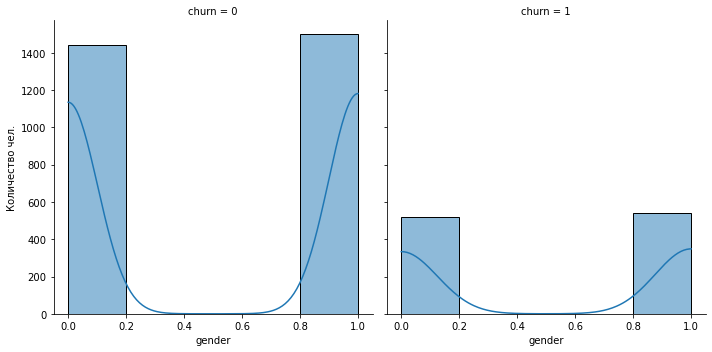

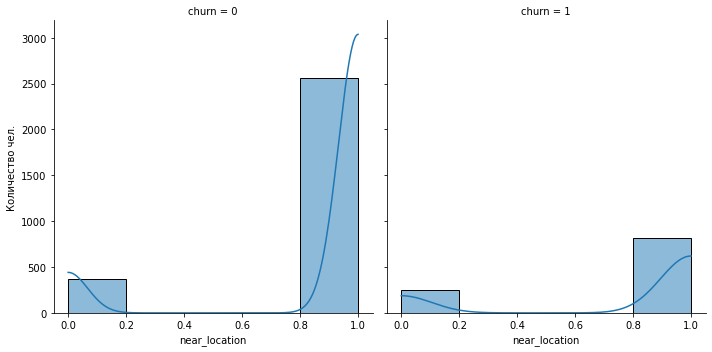

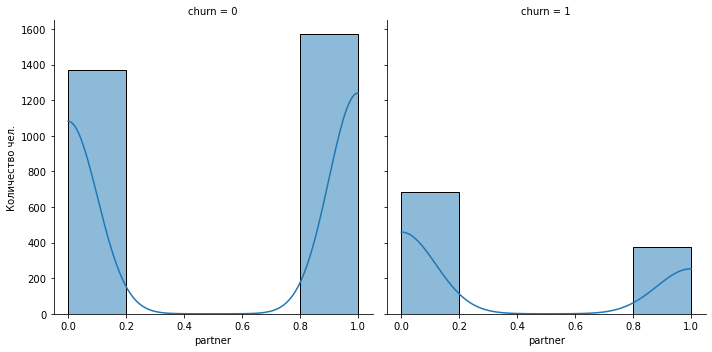

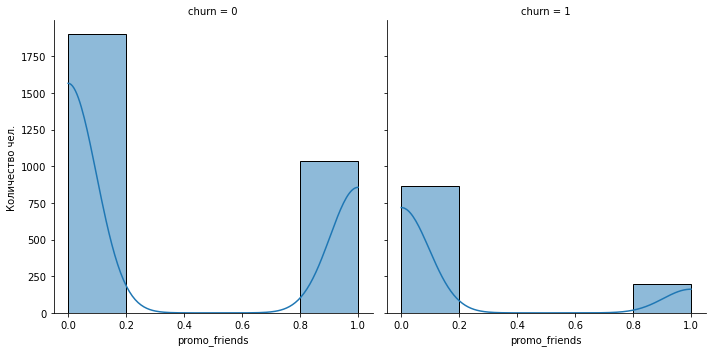

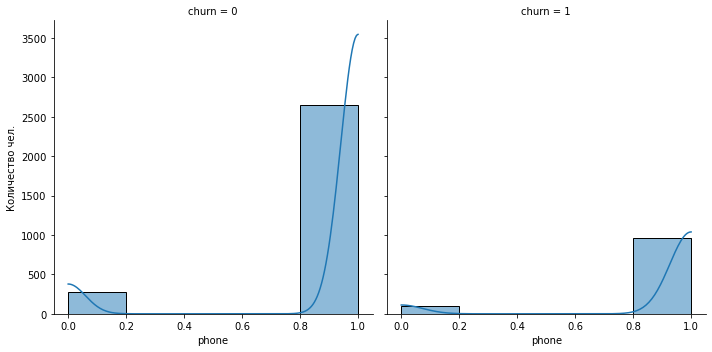

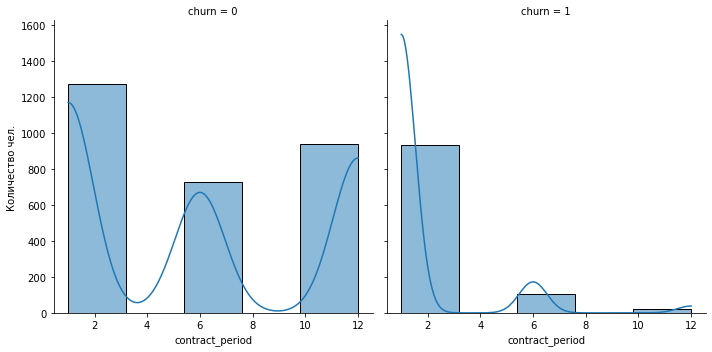

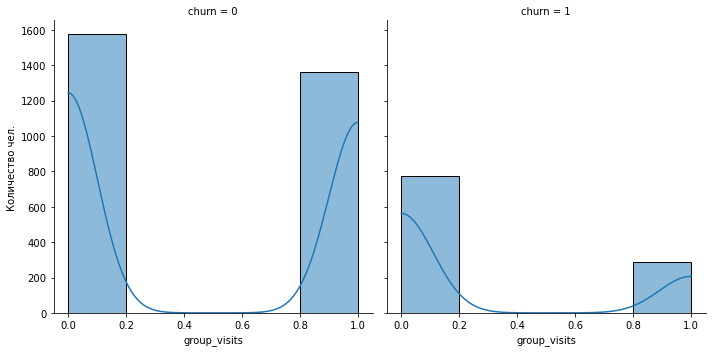

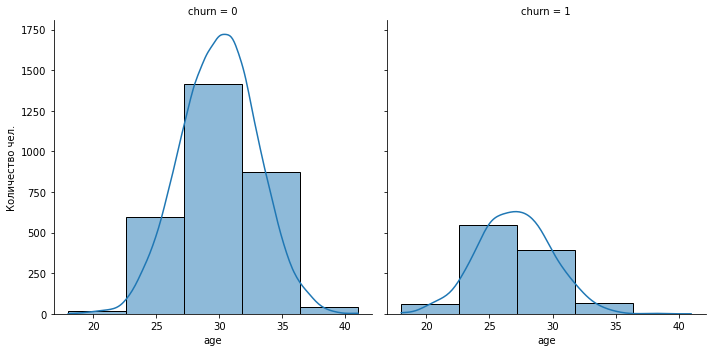

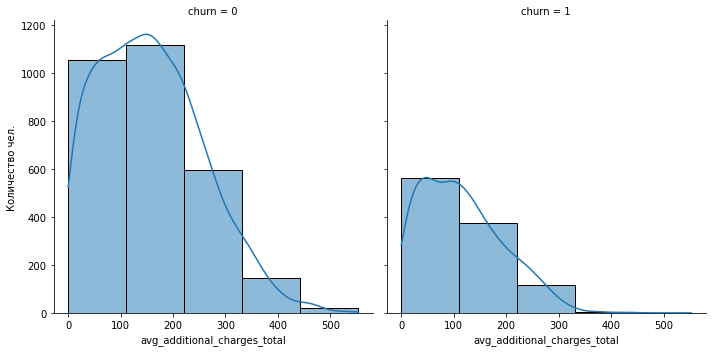

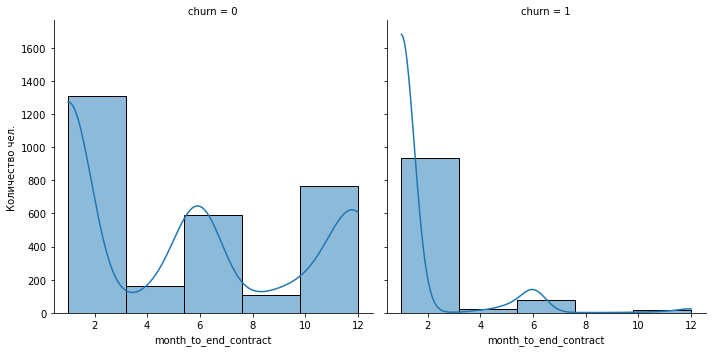

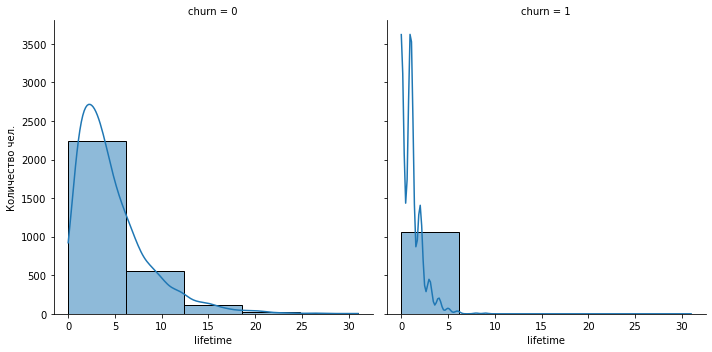

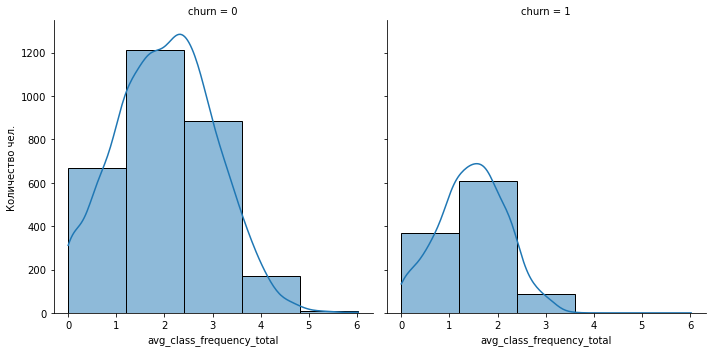

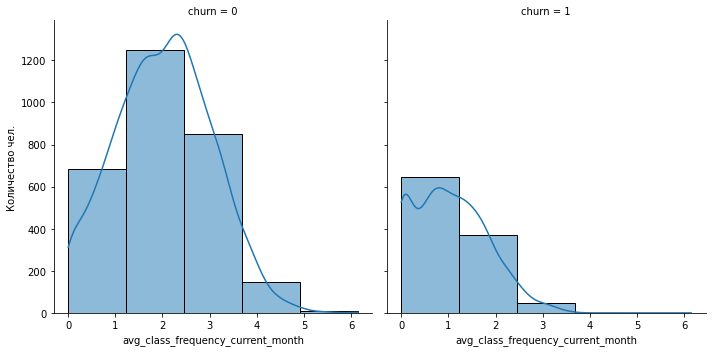

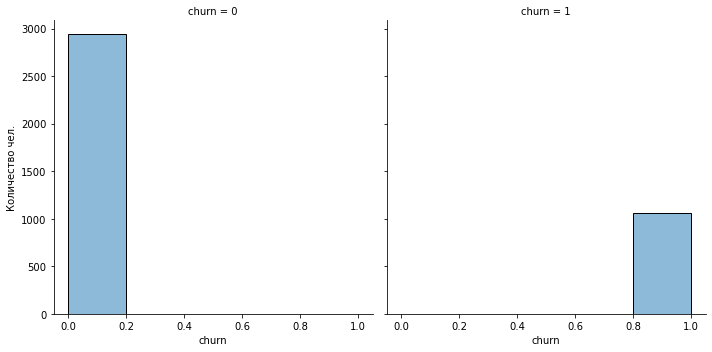

In [9]:
for feature in data.columns:
    g = sns.displot(data=data, x=feature, kind='hist', col='churn', bins=5, kde=True)
    #g.set_titles('churn')
    g.set_axis_labels(feature, 'Количество чел.')
    plt.show() 

По средним значениям, а также по графикам пользователей, можно сказать следующее:

* у большинства клиентов клуб находится рядом с домом/работой, при этом, среди клиентов, которые попали в отток больше тех, у которых клуб находится НЕ рядом с домом/работой (у 23% ушедших пользователей против 17% активных);
* по партнерской программе приходит примерно половина пользователей, при этом среди тех, кто ушел больше тех, кто пришел клуб НЕ по партнерской программе (таких примерно 64%)
* большая часть пользователей пришли НЕ по акции "приведи друга" (лишь 35% среди активных и 18% среди ушедших);
* средняя длительность действующего абонемента 1,7, что говорит о том, что среди ушедших пользователей годовые абонементы и абонементы на 6 месяцев не пользуются популярностью, при этом у активных пользователей все виды абонементов довольно популярны;
* групповые занятия ушедшие пользователи так же посещают почти в два раза меньше, чем активные (у активных пользователей соотношение тех, кто посещает групповые и кто нет ~45/55, тогда как у ушедших эта разница явно больше);
* средний возраст у активных клиентов и тех, кто попал в отток несколько разнится - 30 и 27 лет, в целом по графикам видно, что в отток попадают молодые клиенты до 30;
* средняя выручка, приходящеся на одного клиента, от других услуг фитнес-центра у активных пользователей в районе 160 у.е, а у ушедших - 115 у.е;
* клиенты уходят, когда у них в запасе остается еще 1,5-2 месяца - возможно, это говорит о том, что они покупают абонемент и вообще не ходят по нему или приходят в зал 1-2 раза и все;
* стоит отметить, что среднее время прошедшее с момента первого обращения в фитнес-центр у активных пользователей составляет почти 5 месяцев, а у тех, кто уходит всего 1 месяц;
* также ушедшие клиенты в целом ходят в зал в два раза меньше, чем активные - 1,5 раза в неделю с начала действия абонемента и всего 1 раз в неделю по данным за предыдущий месяц, в то время когда у активных клиентов эти показатели находятся в районе 2

Далее построим матрицу корреляций и отобразим ее графически.

In [10]:
cm = data.corr() #строим матрицу корреляций
cm

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


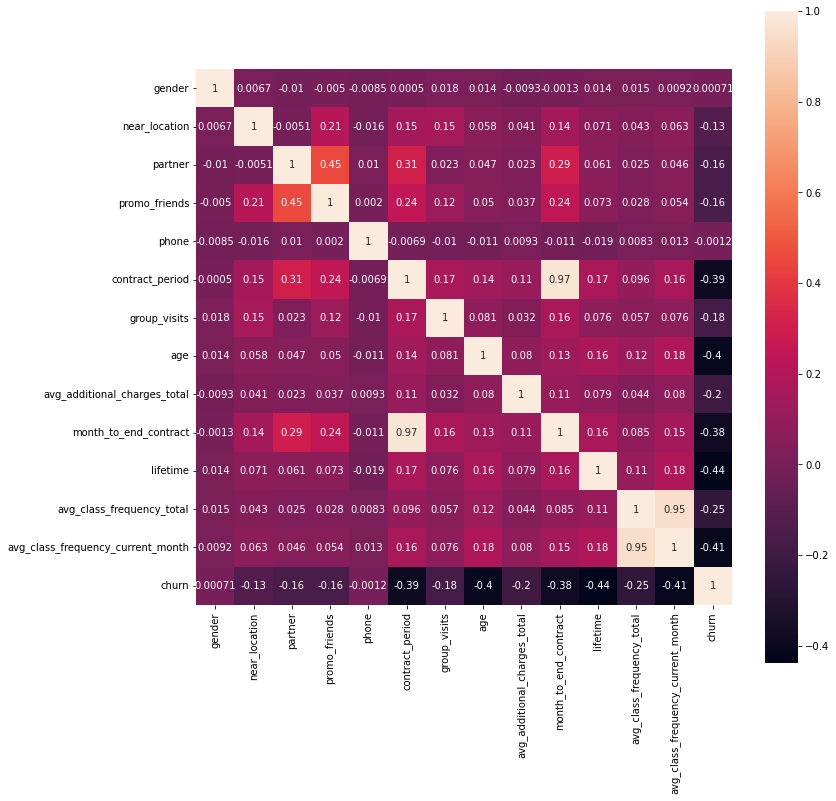

In [11]:
#создаем heatmap по матрице корреляций
plt.figure(figsize=(12,12))
sns.heatmap(cm, square=True, annot=True)

plt.show()


У длительности текущего действующего абонемента (`Contract_period`) и срока до окончания текущего действующего абонемента (в месяцах) (`Month_to_end_contract`) выявлена высокий уровень корреляции - 0,97. А также высокая корреляция (0,95) имеется у признаков `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента и `Avg_class_frequency_current_month` - средняя частота посещений в неделю за предыдущий месяц.

Поскольку у нас были выявлены мультиколлинеарные признаки, чтобы снизить вероятность ошибки моделей, удалим по одному из каждой пары. 

In [12]:
#исключим мультиколлинеарность
data = data.drop(columns=['contract_period', 'avg_class_frequency_current_month'])

# Модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.

In [13]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = data.drop(columns=['churn'])
y = data['churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [14]:
# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()

# обучаем scaler и одновременно трансформируем матрицу для обучающей выборки
X_train_st = scaler.fit_transform(X_train)  

# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

In [15]:
# задаем список моделей
models = [
    LogisticRegression(random_state=0), #логистическая регрессия 
    RandomForestClassifier(n_estimators=100, random_state=0), #случайный лес
]

# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        '\t Accuracy:{:.2f} \t Precision:{:.2f} \t Recall:{:.2f} \t F1:{:.2f} \t ROC_AUC: {:.2f}'.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
            f1_score(y_test, y_pred),
            roc_auc_score(y_test, model.predict_proba(X_test)[:,1]),

           
        )
    )    
    
    
# напишем цикл, который выводит метрики по списку моделей
for i in models:
    print(i)
    make_prediction(m=i, X_train=X_train_st, y_train=y_train, X_test=X_test_st, y_test=y_test)

LogisticRegression(random_state=0)
	 Accuracy:0.90 	 Precision:0.81 	 Recall:0.82 	 F1:0.82 	 ROC_AUC: 0.96
RandomForestClassifier(random_state=0)
	 Accuracy:0.90 	 Precision:0.83 	 Recall:0.79 	 F1:0.81 	 ROC_AUC: 0.95


Для моделей было выбрано несколько метрик: 
   * Accuracy (доля правильных ответов),
   * Precision (точность),
   * Recall (полнота),
   * F1-мера (сводная метрика, учитывающая баланс между Precision и Recall),
   * ROC_AUC (для оценки качества классификатора).

По итогам проведенных расчетов (по метрикам Accuracy, Precision и Recall) можно сказать, что обе модели хороши, поэтому мы ввели дополнительную метрики F1 и ROC_AUC, которые позволили увидеть, что логистическая регрессия немного лучше, чем случайный лес, т.е. является более точной.

# Кластеризация клиентов

Далее стандартизируем данные, построим матрицу расстояний на стандартизированной матрице признаков и нарисуем дендрограмму.

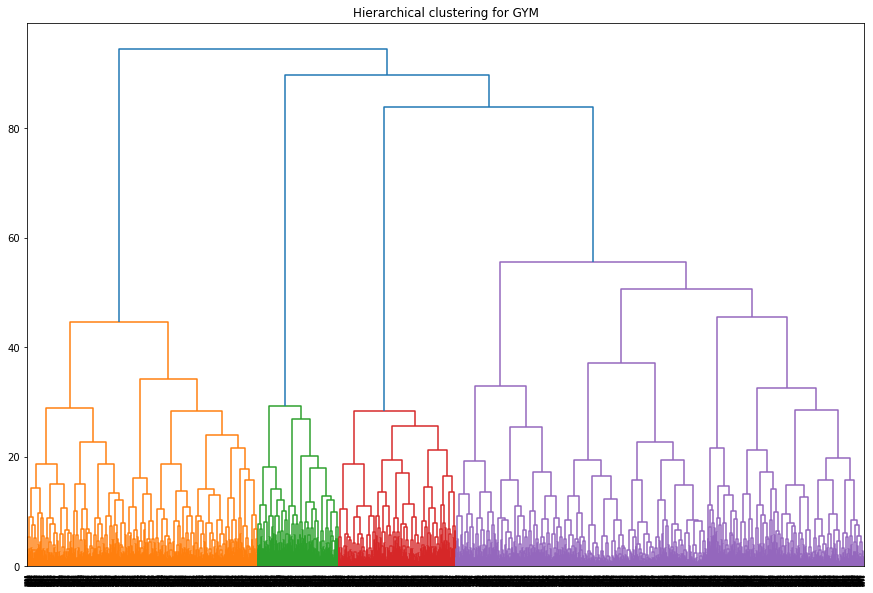

In [16]:
# стандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# строим матрицу расстояний 
linked = linkage(X_sc, method = 'ward')

#рисуем дендрограмму
plt.figure(figsize=(15,10))
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show()

По графику видно, что имеется оптимальное число кластеров - 5 (по разным цветам на графике).

Далее обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. 

In [17]:
km = KMeans(n_clusters = 5) # задаём число кластеров, равное 5
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров

In [18]:
#проверим качество кластеризации метрикой силуэта
data['cluster_km'] = labels
silhouette_score(X_sc, labels)

0.13908672780853912

Данная метрика показывает насколько объект похож на свой кластер по сравнению с другими кластерами. Коэффициент ограничен от -1 за неправильную кластеризацию до +1 за высокоплотную кластеризацию. Баллы около нуля указывают на перекрывающиеся кластеры.

Посмотрим какое количество человек попало в разные кластеры.

In [19]:
data['cluster_km'].value_counts().sort_values()

3     386
1     559
2     814
0    1094
4    1147
Name: cluster_km, dtype: int64

И посмотрим на средние значения признаков для кластеров.

In [20]:
data.groupby('cluster_km').mean().T

cluster_km,0,1,2,3,4
gender,0.487203,0.500894,0.549140,0.523316,0.504795
near_location,0.993601,0.000000,1.000000,0.862694,1.000000
partner,0.957952,0.486583,0.197789,0.471503,0.247602
promo_friends,0.857404,0.073345,0.084767,0.305699,0.059285
phone,1.000000,1.000000,1.000000,0.000000,1.000000
group_visits,0.491773,0.236136,1.000000,0.427461,0.000000
age,29.592322,28.717352,29.481572,29.297927,28.773322
avg_additional_charges_total,155.783378,137.901781,148.089149,144.208179,143.026919
month_to_end_contract,7.236746,2.821109,3.644963,4.466321,2.707934
lifetime,4.375686,3.059034,3.750614,3.940415,3.337402


Самый многочисленный кластер получился 4-ый, по нему также самый большой процент оттока клиентов - 52%, второй по оттоку получился 1-ый кластер (40%), при этом клиентов в нем в два раза меньше, чем в 4-ом (всего 557 человек). 
Оба этих кластера объединяют низкие показатели прихода по акции "приведи друга", низкая посещаемость групповых занятий, средний возраст ниже, чем у остальных кластеров, так же ниже выручка, приходящаяся на одного клиента на сопутствующие услуги клуба. Помимо этого ниже среднее количество месяцев до окончания абонемента и время с момента первого обращения в клуб. А также в первый кластет попали клиенты, у которых клуб находится не рядом с домом/работой.

Далее построим распределения признаков для кластеров.

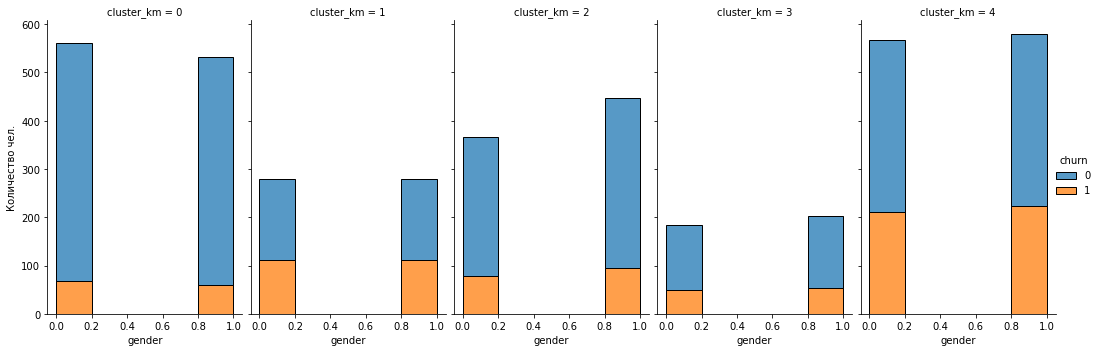

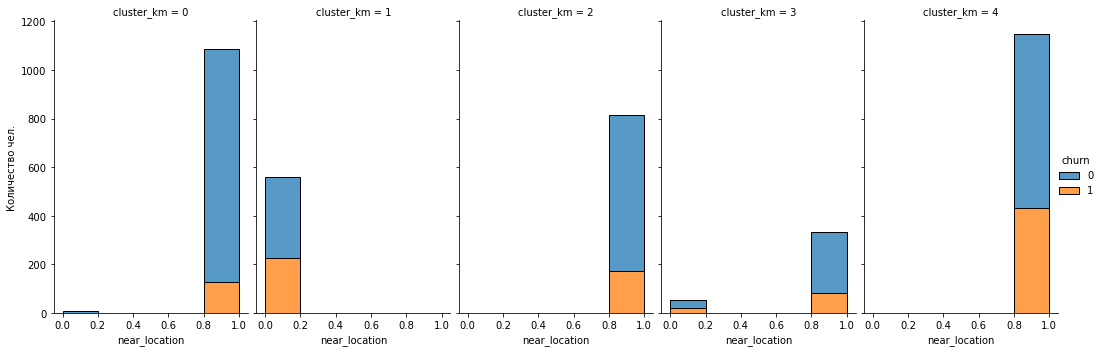

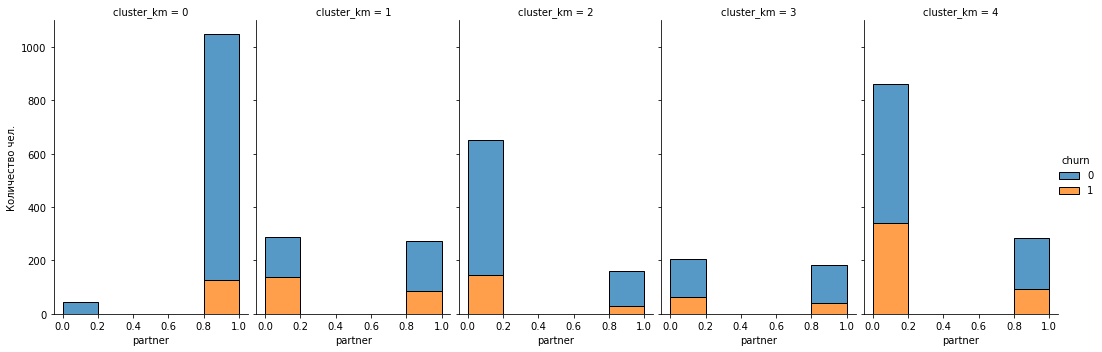

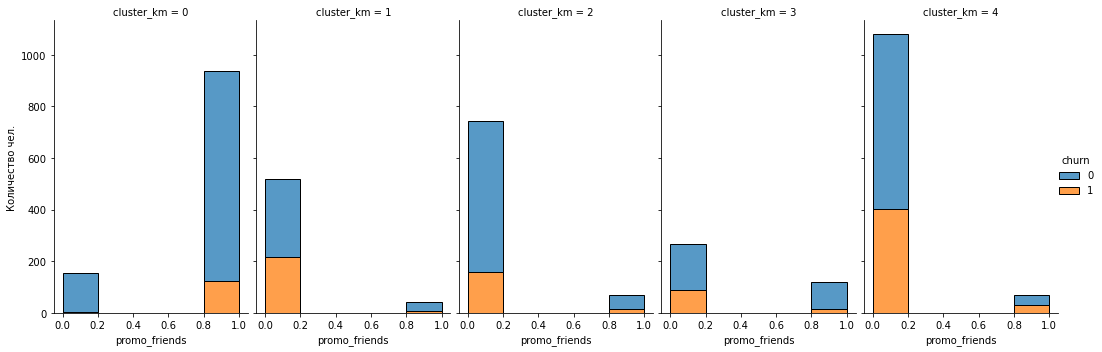

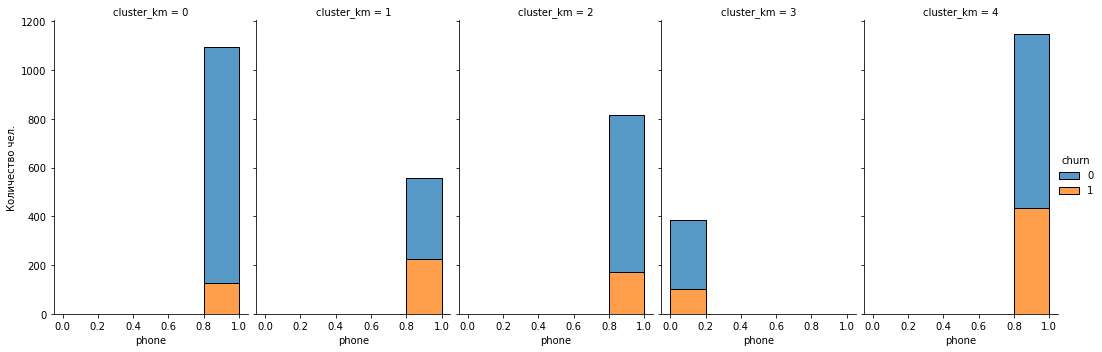

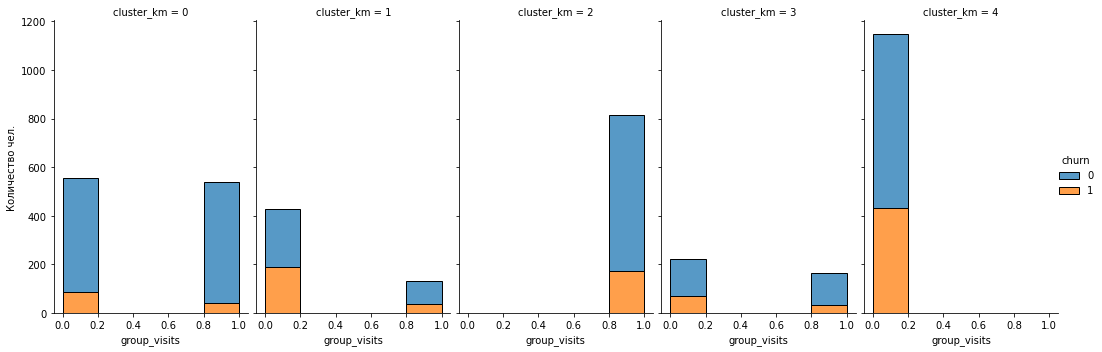

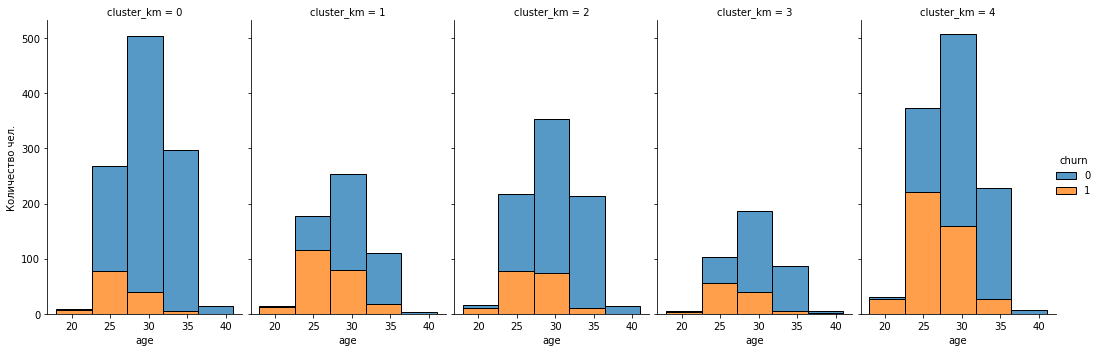

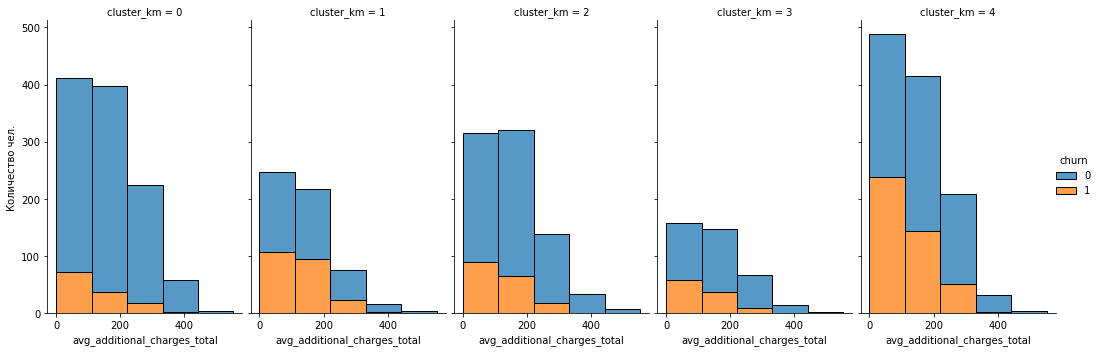

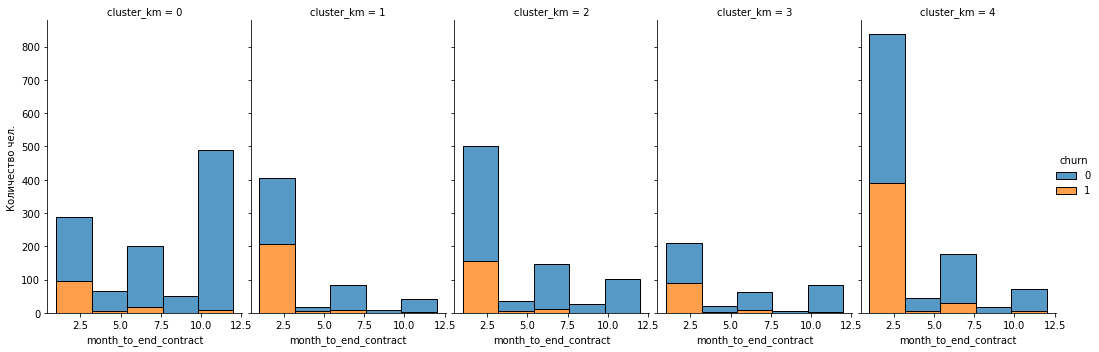

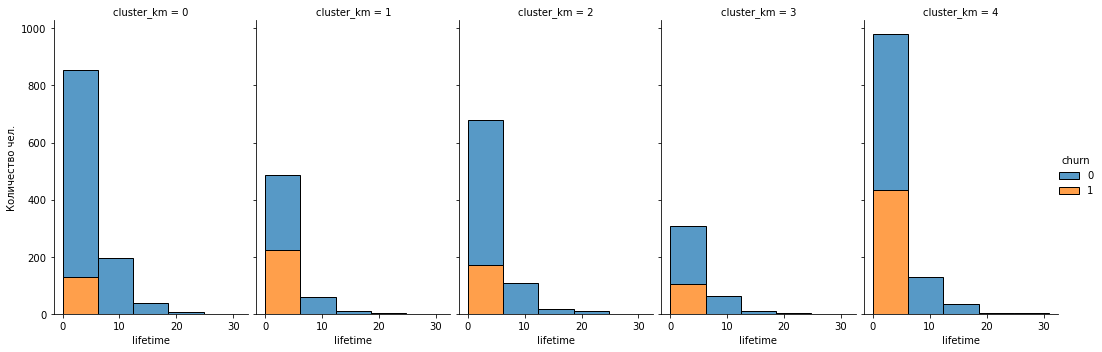

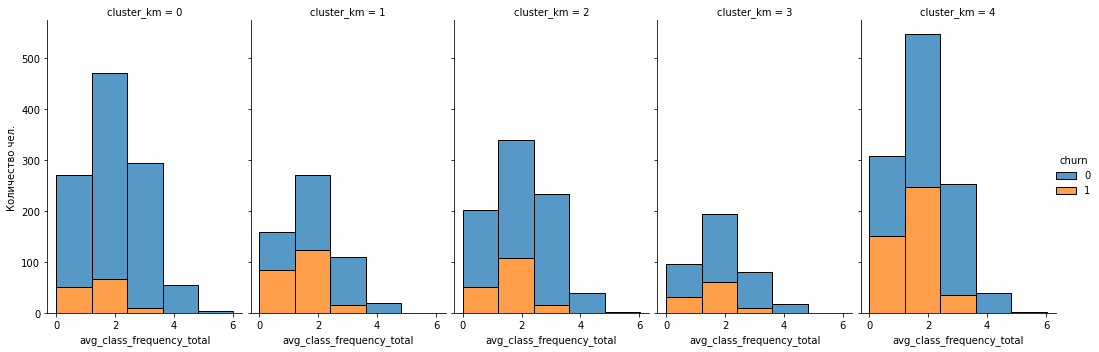

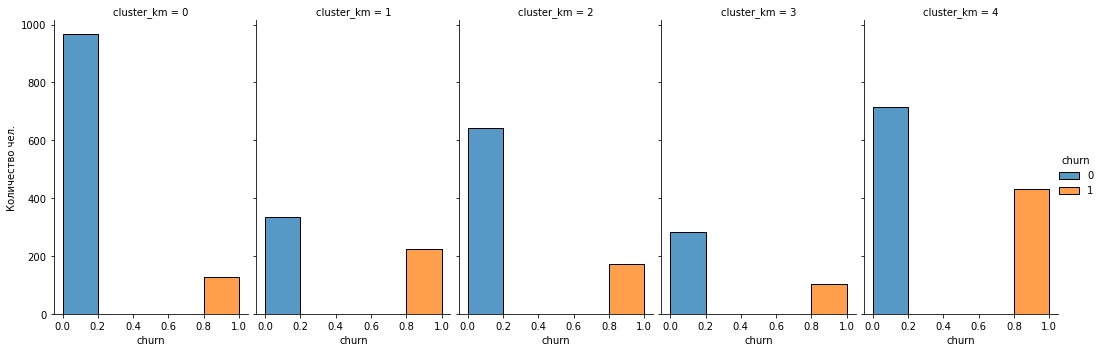

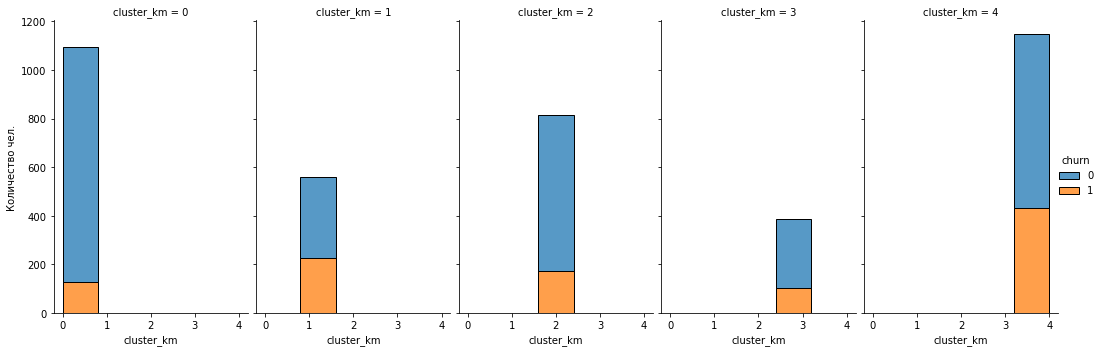

In [21]:
for feature in data.columns:
    g = sns.displot(data=data, x=feature, kind='hist', col='cluster_km', hue='churn', bins=5, multiple='stack')
    #g.set_titles('churn')
    g.set_axis_labels(feature, 'Количество чел.')
    g.fig.set_figwidth(15)
    g.fig.set_figheight(5)
    plt.show() 

По графикам можно сделать следующие выводы по кластерам с максимальным оттоком (1 и 4):
 * в 1 кластер попале те, у кого зал находится НЕ рядом с домом/работой, а в 4 - наоборот, только те, у кого зал находятся рядом,
 * большая часть людей из 4-ого кластера пришла не по партнерской программе и не по акции "приведи друга",
 * в нулевой (0) кластер попали люди, которые не оставляли свой номер телефона (среди них тоже имеется отток в размере 27%), 
 * самый низкий показатель посещения групповых занятий в 4 кластере и в 1, в остальных примерно 50/50,
 * средний возраст клиентов, попавших в отток во всех кластерах - 25 лет,
 * чем меньше пользователь тратит на доп. услуге в клубе - тем больше вероятность, что он уйдет в отток,
 * у большинства пользователей, ушедших в отток абонементы краткосрочные, 
 * пользователи, ушедшие в отток, редко посещают фитнес-центр чаще двух раз в неделю.
 
 

In [22]:
data.groupby('cluster_km').agg({'churn':'mean'}).sort_values(by='churn')

,churn
cluster_km,
0,0.117002
2,0.212531
3,0.266839
4,0.377507
1,0.400716


Самый надежный кластер - 2-ой, отток у него всего 2%, этих пользователей характеризует высокая платежеспобность, абонементы они покупают сразу на год, живут/работают недалеко от зала, больше половины из них ходят на групповые занятия. 

Так же кластер номер 3 тоже является неплохим - отток у него порядка 13%, по характеристикам портрета он немного уступает клиентам из 2 кластера, но его дополнительно еще характеризуют два признака: 89% клиентов пришли по партнерской программе, а 99% по акции "приведи друга". 

# Выводы и рекомендации

По итогам проведенного исследования выполнили:
* предобработку данных, 

* построили две прогнозные модели (логистическая регрессия и случайный лес), метрики по которым показали довольно высокие результаты, однако логичестическая регрессия показала себя немного лучше,

* провели кластеризацию клиентов, в ходе которой разделили клиентов на 5 кластеров: 

  0.  В данный кластер попали все клиенты, которые не указали свой номер телефона. 
            Доля оттока таких клиентов - 26%. 
            - проживают рядом с фитнес-центром,
            - пришедших по партнерской программе порядка 47%,
            - пришедших по акции "приведи друга" около 31%,
            - групповые занятия посещают 43%,
            - средний возраст 29 лет,
            - средняя выручка от других услуг фитнес-центра - 144 у.е на человека,
            - среднее время до окончания действия абонемента - 4,5 месяцев, с первого обращения прошло в среднем 4 месяца,
            - ходят в зал в среднем 1,8 раз в неделю.
  1.  В данный кластер попали клиенты, которые не проживают/не работают рядом с фитнес-центром. 
            Доля оттока таких клиентов - 40%. 
            - пришедших по партнерской программе порядка 49%,
            - пришедших по акции "приведи друга" около 7%,
            - групповые занятия посещают 23%,
            - средний возраст 28,7 лет,
            - средняя выручка от других услуг фитнес-центра - 137 у.е на человека,
            - среднее время до окончания действия абонемента - 2,8 месяцев, с первого обращения прошло в среднем 3 месяца,
            - ходят в зал в среднем 1,7 раз в неделю.
            
  2.  В данный кластер попали клиенты с самым высоким показателем посещения зала в неделю - более 2-ух раз.
             Доля оттока таких клиентов - 2%. 
            - проживают рядом с фитнес-центром,
            - пришедших по партнерской программе порядка 39%,
            - пришедших по акции "приведи друга" около 1%,
            - групповые занятия посещают 54%,
            - средний возраст 30-31 год,
            - средняя выручка от других услуг фитнес-центра - 179 у.е на человека,
            - среднее время до окончания действия абонемента - 6 месяцев, с первого обращения прошло в среднем 5,5 месяцев.
            
  3.  В данный кластер попали клиенты, почти 100% которых пришли о акции "приведи друга". 
             Доля оттока таких клиентов - 13%. 
            - проживают рядом с фитнес-центром,
            - пришедших по партнерской программе порядка 90%,
            - групповые занятия посещают 52%,
            - средний возраст 29,5 лет,
            - средняя выручка от других услуг фитнес-центра - 152 у.е на человека,
            - среднее время до окончания действия абонемента - 6 месяцев, с первого обращения прошло в среднем 4 месяца,
            - ходят в зал в среднем около 2 раз в неделю.  
            
  4.  В данный кластер попали все клиенты с краткосрочными абонементами (оставшийся срок действия 2 месяца).
             Доля оттока таких клиентов - 52%. 
            - проживают рядом с фитнес-центром,
            - пришедших по партнерской программе порядка 21%,
            - пришедших по акции "приведи друга" около 6%,
            - групповые занятия посещают 29%,
            - средний возраст 27,7 лет,
            - средняя выручка от других услуг фитнес-центра - 120 у.е на человека,
            - с первого обращения прошло в среднем 2 месяца,
            - ходят в зал в среднем около 1,5 раза в неделю.

По итогам проведенной кластеризации можно сделать вывод, что клиенты, которые покупают краткосрочные абонементы самые не выгодные для фитнес-центра - отток среди таких клиентов самый высокий - 52%. Так же среди тех, кто не проживают/не работают рядом с клубом имеется большой отток - 40%. 

**Рекомендации**

* По данным исследования средний возраст активных клиентов - 30 лет, в связи с этим, стоит направить таргетную рекламу в соц. сетях и прочих каналах именно на этот возраст (и старше), а не 20-25 лет. 


* Искать компании для заключения партнерских соглашений, которые находятся непосредственно рядом с клубами. 


* Возможно, стоит прекратить продажу 1-месячных абонементов, потому что с точки зрения экономического эффекта для фитнес-центра это получается не очень выгодно. Стоит сконцентрировать усилия на продаже 6-ти и 12-ти месячных абонементов (в том числе и потому, что клиенты, покупающие такие абонементы тратят больше денег на другие услуги фитнес-клуба) - данный пункт можно осуществить после проведения A/B теста (последний пункт).


* Чтобы измерить эффективность прогнозных моделей, нужно оценить какой процент пользователей из тех, что собирались уйти в отток примут скидку и после этого останутся, для этого необходимо запустить A/B тест: 
    - А - скидки никому не раздаются, но при этом мы прогнозируем, будет ли клиент активным в следующем месяце или попадет в отток на основе ML-рекомендаций,
    - B - скидки раздаются тем клиентам, которые попадают в отток по прогнозу ML. 